In [43]:
import pandas as pd  #  (For data processing and analysis)
import numpy as np
from sklearn.model_selection import train_test_split  # (To split training and test sets)
from sklearn.linear_model import LogisticRegression  # Logistic (Logistic Regression model)
from sklearn.metrics import accuracy_score, classification_report  #  (For model evaluation)
from imblearn.under_sampling import RandomUnderSampler  #  (For handling imbalanced data)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [44]:
# Load the dataset
data_path = r"C:\Users\Admin\Desktop\ML online\week3\dataset\kddcup.data.gz"  
df = pd.read_csv(data_path, header=None)  #  (No header)

# View the first 5 rows of the dataset to ensure it is loaded correctly
df.head()



,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [45]:
# Create labels for Probe and Non-Probe: 1 for Probe, 0 for Non-Probe
probe_attacks = ['ipsweep.', 'nmap.', 'portsweep.', 'satan.']  # Probe攻击类型 (Probe attack types)

# Apply a lambda function to assign labels for each row
df['target'] = df[41].apply(lambda x: 1 if x in probe_attacks else 0)

# Drop the original attack type column (the 42nd column)
df = df.drop(columns=[41])

# Check the distribution of the target labels
df['target'].value_counts()


target
0    4857329
1      41102
Name: count, dtype: int64

In [46]:
# Define features (X) and target variable (y)
X = df.drop(columns=['target'])  #  (All columns except the target column are features)
y = df['target']  # (Target variable is 'target')

# RandomUnderSampler
# Use RandomUnderSampler to perform under-sampling to balance the data
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Check the distribution of the target variable after resampling
y_res.value_counts()

categorical_columns = [1, 2, 3]  

# OneHotEncoder 
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)  
    ],
    remainder='passthrough'  
)

X_encoded = column_transformer.fit_transform(X_res)

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_res, test_size=0.2, random_state=42)

# Output the sizes of the training and test sets
X_train.shape, X_test.shape


((65763, 119), (16441, 119))

In [48]:
# Initialize the Logistic Regression model with max_iter set to 2000
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = log_reg.predict(X_train)
# Output the number of iterations taken to converge during training
print(f"Iterations for convergence during training: {log_reg.n_iter_}")

# Make predictions on the test set
y_test_pred = log_reg.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the accuracy on the training and test sets
print(f"train_accuracy: {train_accuracy}")
print(f"test_accuracy: {test_accuracy}")




'''
Overfitting Analysis:
The training accuracy and testing accuracy are very close, with a difference of about 0.59%. 
This small gap suggests that the model is not overfitting to the training data, 
as the performance on both the training and test sets is fairly consistent.

Iterations for convergence during training： 924
'''

Iterations for convergence during training: [924]
train_accuracy: 0.7118744582820127
test_accuracy: 0.705918131500517


'\nOverfitting Analysis:\nThe training accuracy and testing accuracy are very close, with a difference of about 0.59%. \nThis small gap suggests that the model is not overfitting to the training data, \nas the performance on both the training and test sets is fairly consistent.\n\nIterations for convergence during training： 924\n'

L1 Accuracy: 0.9938568213612311
L2 Accuracy: 0.705918131500517


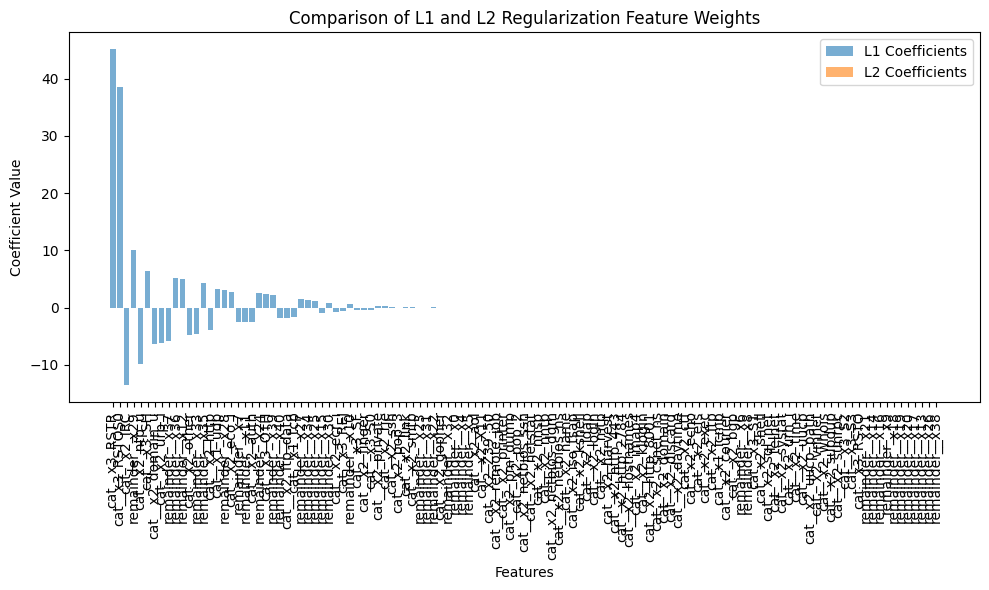

"\nExplanation:\nTrain L1 and L2 Logistic Regression models:\n\nThe code first trains two models: one with L1 regularization and one with L2 regularization.\nThe penalty parameter is set to 'l1' for L1 regularization and 'l2' for L2 regularization.\nCompare the accuracies:\n\nAfter predicting the test set using both models, we calculate the accuracy using accuracy_score and print the results.\nExtract and plot the feature weights:\n\nThe coefficients (weights) for each feature are extracted for both L1 and L2 models.\nA bar chart is created to compare the weights of features for both regularizations side by side. This gives a visual insight into how L1 and L2 affect the feature weights differently.\nKey Points:\nL1 regularization tends to set many weights to exactly 0, which effectively performs feature selection.\nL2 regularization tends to shrink weights towards 0 but not completely to 0, retaining all features but reducing their impact.\n"

In [49]:
# Train Logistic Regression with L1 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
log_reg_l1.fit(X_train, y_train)
y_test_pred_l1 = log_reg_l1.predict(X_test)
l1_accuracy = accuracy_score(y_test, y_test_pred_l1)

# Train Logistic Regression with L2 regularization
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
log_reg_l2.fit(X_train, y_train)
y_test_pred_l2 = log_reg_l2.predict(X_test)
l2_accuracy = accuracy_score(y_test, y_test_pred_l2)

# Print L1 and L2 accuracies
print(f"L1 Accuracy: {l1_accuracy}")
print(f"L2 Accuracy: {l2_accuracy}")

# Extract feature names from ColumnTransformer if you used one
# If not, replace with your actual feature names
feature_names = column_transformer.get_feature_names_out()

# Get coefficients for L1 and L2
l1_coefficients = log_reg_l1.coef_[0]
l2_coefficients = log_reg_l2.coef_[0]

# Create a DataFrame for easier comparison
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'L1_Coefficient': l1_coefficients,
    'L2_Coefficient': l2_coefficients
})

# Sort by absolute value of L1 coefficient for better visibility
coeff_df['Abs_L1_Coefficient'] = coeff_df['L1_Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='Abs_L1_Coefficient', ascending=False)

# Plot the feature weights for L1 and L2 regularization
plt.figure(figsize=(10, 6))
plt.bar(coeff_df['Feature'], coeff_df['L1_Coefficient'], alpha=0.6, label='L1 Coefficients')
plt.bar(coeff_df['Feature'], coeff_df['L2_Coefficient'], alpha=0.6, label='L2 Coefficients')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Comparison of L1 and L2 Regularization Feature Weights')
plt.legend()
plt.tight_layout()
plt.show()
'''
Explanation:
Train L1 and L2 Logistic Regression models:

The code first trains two models: one with L1 regularization and one with L2 regularization.
The penalty parameter is set to 'l1' for L1 regularization and 'l2' for L2 regularization.
Compare the accuracies:

After predicting the test set using both models, we calculate the accuracy using accuracy_score and print the results.
Extract and plot the feature weights:

The coefficients (weights) for each feature are extracted for both L1 and L2 models.
A bar chart is created to compare the weights of features for both regularizations side by side. This gives a visual insight into how L1 and L2 affect the feature weights differently.
Key Points:
L1 regularization tends to set many weights to exactly 0, which effectively performs feature selection.
L2 regularization tends to shrink weights towards 0 but not completely to 0, retaining all features but reducing their impact.
'''

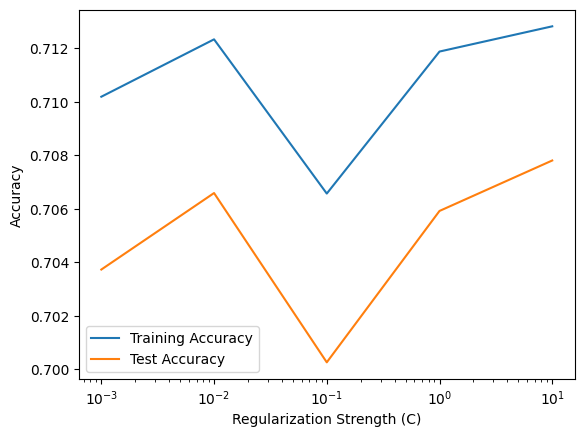

'\nInterpretation of the Plot:\nThe plot shows how training accuracy and test accuracy change with different regularization strengths (C), \nusing a logarithmic scale on the x-axis.\n\nKey Observations:\nSmall C values (strong regularization):\n\nWhen C is very small(10 -3), both training and test accuracy are relatively lower.\nThis indicates that the model is under-regularized and cannot fully capture the complexity of the data, leading to underfitting.\nModerate C values:\n\nAt moderate C values (e.g., 10-2), the training accuracy reaches a peak, suggesting that the model fits the training data well.\nHowever, test accuracy shows a dip at 10-1, which may suggest overfitting. The model fits the training data too well, at the cost of generalization on the test data.\nLarge C values (weak regularization):\n\nAs C increases (e.g., 1 and 10 ), both training and test accuracy start to increase again, and the model begins to generalize better.\nThis suggests that the model is finding a bal

In [50]:
# Define different L2 regularization strengths
regularization_strengths = [0.001, 0.01, 0.1, 1, 10]
train_acc = []
test_acc = []

# Loop through each regularization strength
for c in regularization_strengths:
    log_reg_l2 = LogisticRegression(C=c, penalty='l2', solver='liblinear', max_iter=5000)
    log_reg_l2.fit(X_train, y_train)
    
    # Calculate accuracy on training and test sets
    train_acc.append(accuracy_score(y_train, log_reg_l2.predict(X_train)))
    test_acc.append(accuracy_score(y_test, log_reg_l2.predict(X_test)))

# Plot the relationship between regularization strength and accuracy
plt.plot(regularization_strengths, train_acc, label="Training Accuracy")
plt.plot(regularization_strengths, test_acc, label="Test Accuracy")
plt.xscale('log')  # Logarithmic scale for C values
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
'''
Interpretation of the Plot:
The plot shows how training accuracy and test accuracy change with different regularization strengths (C), 
using a logarithmic scale on the x-axis.

Key Observations:
Small C values (strong regularization):

When C is very small(10 -3), both training and test accuracy are relatively lower.
This indicates that the model is under-regularized and cannot fully capture the complexity of the data, leading to underfitting.
Moderate C values:

At moderate C values (e.g., 10-2), the training accuracy reaches a peak, suggesting that the model fits the training data well.
However, test accuracy shows a dip at 10-1, which may suggest overfitting. The model fits the training data too well, at the cost of generalization on the test data.
Large C values (weak regularization):

As C increases (e.g., 1 and 10 ), both training and test accuracy start to increase again, and the model begins to generalize better.
This suggests that the model is finding a balance between fitting the training data and generalizing to unseen data.
Explanation of Results:
Underfitting (small C values): Strong regularization (small C) forces the model coefficients to be too small, 
which prevents the model from capturing important patterns in the training data, 
leading to lower accuracy on both training and test sets.

Overfitting (moderate C values): When C is too high, the model becomes too complex and starts to fit noise in the training data, 
which reduces its ability to generalize, leading to a drop in test accuracy.

Optimal Generalization (large C values): When C is moderate, the model reaches a balance between underfitting and overfitting, 
achieving better generalization on the test set.

Conclusion:
The plot shows that the model performs best at moderate values of C, where the training accuracy is reasonably high, 
and the test accuracy does not drop significantly. As C increases, the model is better able to generalize, 
but if C becomes too high, it risks overfitting to the training data.
'''


In [51]:
import numpy as np
import pandas as pd
# Get the feature names after one-hot encoding
# Assume you used OneHotEncoder, and original X columns had categorical columns indexed by categorical_columns
encoded_feature_names = column_transformer.get_feature_names_out()

# Get the coefficients from the trained model
coefficients = log_reg.coef_[0]

# Create a DataFrame to associate feature names with their coefficients
feature_importance = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients to get the most important features
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
important_features = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 most important features
print(important_features.head(10))

# get all feature names
feature_names = list(df.columns)  

# remainder__x23 
# column 23
original_feature_name_x23 = feature_names[23]
print(f"remainder__x23 corresponds to the original feature: {original_feature_name_x23}")

'''
column 23: count
remainder__x23 corresponds to the 23rd feature in your original dataset, 
which you mentioned is the count feature. This feature was identified as one of the most informative features in the trained model. 
Let’s analyze why this feature is important and whether it makes sense in the context of the model.

1. Meaning of the count feature:
In network traffic data or network attack detection tasks, the count feature typically represents the total number of certain events or operations in a connection. 
This could be the number of network packets, connection attempts, or similar measures.
If the count value for a network connection is unusually high, it could indicate abnormal behavior such as scanning or probing, 
which is commonly associated with network attacks. Normal network traffic typically has moderate or lower counts.
2. Why is count important?:
Network attack behavior: In network attacks, particularly probing (Probe) attacks, attackers often rapidly scan multiple ports or IP addresses to identify vulnerabilities. 
Therefore, a high count value may be indicative of such abnormal scanning behavior. 
This makes the count feature highly valuable in identifying potential attacks.
Traffic characteristics: If a connection has a high count of activities, 
it may signal excessive, potentially malicious activity (e.g., port scanning, denial-of-service attempts), helping the model distinguish between normal and malicious connections.
3. Does it make sense?:
Yes, it makes sense that count is one of the most informative features for your model. 
In the context of network attack detection, high activity counts can be strong indicators of certain types of attacks (such as probing), making it a crucial feature for distinguishing between "Probe" and "Non-Probe" traffic.
Conclusion:
The count feature plays a significant role in detecting abnormal network activity, 
which is typical in network intrusion detection tasks. Its importance in the model is justified, 
as it helps in identifying attack patterns associated with high activity levels.
'''

            Feature  Coefficient  Abs_Coefficient
101  remainder__x23    -0.013213         0.013213
100  remainder__x22     0.003222         0.003222
110  remainder__x32     0.001446         0.001446
113  remainder__x35     0.000335         0.000335
112  remainder__x34     0.000234         0.000234
17    cat__x2_eco_i     0.000221         0.000221
106  remainder__x28     0.000208         0.000208
104  remainder__x26     0.000205         0.000205
105  remainder__x27     0.000204         0.000204
118  remainder__x40     0.000204         0.000204
remainder__x23 corresponds to the original feature: 23


'\ncolumn 23: count\nremainder__x23 corresponds to the 23rd feature in your original dataset, \nwhich you mentioned is the count feature. This feature was identified as one of the most informative features in the trained model. \nLet’s analyze why this feature is important and whether it makes sense in the context of the model.\n\n1. Meaning of the count feature:\nIn network traffic data or network attack detection tasks, the count feature typically represents the total number of certain events or operations in a connection. \nThis could be the number of network packets, connection attempts, or similar measures.\nIf the count value for a network connection is unusually high, it could indicate abnormal behavior such as scanning or probing, \nwhich is commonly associated with network attacks. Normal network traffic typically has moderate or lower counts.\n2. Why is count important?:\nNetwork attack behavior: In network attacks, particularly probing (Probe) attacks, attackers often rapidl